In [1]:
import pandas as pd
import numpy as np
import pickle
from profanity import profanity
from better_profanity import profanity as better_profanity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
data = pd.read_csv('steam_negative_reviews-ENGLISH-preprocessed.csv', nrows=10000)
data.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85155206,english,they certainly dumbed down the series since th...,1611337043,1611337043,False,0,0,...,True,False,False,76561198010955177,379,73,8966.0,0.0,8966.0,1.514417e+09
1,292030,The Witcher 3: Wild Hunt,85128129,english,terribly bugs keeps kicking me out to home scr...,1611299056,1611299056,False,0,0,...,True,False,False,76561198332696736,23,1,8565.0,4973.0,8442.0,1.611364e+09
2,292030,The Witcher 3: Wild Hunt,85109753,english,while there is a lot of content the game loves...,1611265004,1611265004,False,0,0,...,True,False,False,76561198098346837,507,47,2081.0,0.0,2081.0,1.606027e+09
3,292030,The Witcher 3: Wild Hunt,85064415,english,after serious consideration i think this game ...,1611195190,1611195190,False,1,1,...,True,False,False,76561198085431842,206,65,2031.0,0.0,2031.0,1.594446e+09
4,292030,The Witcher 3: Wild Hunt,85044205,english,terrible map design and function meh combat an...,1611164410,1611164410,False,0,0,...,True,False,False,76561198341528559,48,1,861.0,861.0,861.0,1.611164e+09


In [86]:
data.review= data.review.astype(str)

In [87]:
type(data.review[990])

str

In [88]:
data.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [89]:
data= data.loc[:,{'app_name', 'review_id', 'review', 'author.steamid'}]

In [90]:
data["is_profanity"]= data['review'].apply(lambda x: int(1) if better_profanity.contains_profanity(str(x)) else int(0))

In [92]:
data= data[["is_profanity","review"]]

### Exploratory data analysis

In [91]:
data.shape

(10000, 5)

In [93]:
data.is_profanity.value_counts(normalize=True)

0    0.7573
1    0.2427
Name: is_profanity, dtype: float64

In [94]:
data.is_profanity.value_counts()

0    7573
1    2427
Name: is_profanity, dtype: int64

### Text processing

In [95]:
data['review'] = data['review'].astype("string")

In [136]:
# dealing with words with too many characters
data['review'] = data['review'].apply(lambda x: [i if len(i)<13 else "" for i in x])

In [140]:
data['review'] = data['review'].apply(lambda x: ''.join(x))

In [141]:
data['review']

0       t h e y   c e r t a i n l y   d u m b e d   d ...
1       t e r r i b l y   b u g s   k e e p s   k i c ...
2       w h i l e   t h e r e   i s   a   l o t   o f ...
3       a f t e r   s e r i o u s   c o n s i d e r a ...
4       t e r r i b l e   m a p   d e s i g n   a n d ...
                              ...                        
9995    t o o   m a n y   f a c e t s   o f   t h i s ...
9996    t h i s   g a m e   i s   n o t h i n g   l i ...
9997    t r i e d   t o   l i k e   i t   b u t   a s ...
9998    s a v e   y o u r   m o n e y   t h i s   i s ...
9999    m i s e r y   m i s e r y   m i s e r y   t h ...
Name: review, Length: 10000, dtype: object

### Prepare data for modeling

In [96]:
# Split the data into X and y data sets
X = data.review
y = data.is_profanity

In [97]:
# train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=7)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# CV unigram
cv1= CountVectorizer(stop_words="english")
X_train_cv1= cv1.fit_transform(X_train)
X_test_cv1= cv1.transform(X_test)

In [99]:
df_cv1= pd.DataFrame(X_train_cv1.toarray(), columns= cv1.get_feature_names())

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
df_cv1

,aa,aaa,aaaaaaaaaaaaaaa,aaaaaand,aaaaaarrrrghgghhhhhh,aaaand,aaaannd,aaas,aalll,aard,...,zones,zoom,zoomed,zoomer,zooming,zooms,zu,zur,zzz,zzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# CV ngram 2
cv2= CountVectorizer(ngram_range=(1,2),binary=True, stop_words="english")
X_train_cv2= cv2.fit_transform(X_train)
X_test_cv2= cv2.transform(X_test)


In [102]:
df_cv2= pd.DataFrame(X_train_cv2.toarray(), columns= cv2.get_feature_names())

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
df_cv2

,aa,aa aa,aa aaa,aa generic,aa plaes,aaa,aaa checks,aaa companies,aaa design,aaa developers,...,zu,zu cheaten,zu finden,zu fliegen,zu verwenden,zur,zur auswahl,zzz,zzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzz cup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Try classifying using Logistic Regression

In [104]:
# logistic regression model to use
lr = LogisticRegression()

In [106]:
lr.fit(X_train_cv1,y_train)
y_pred_cv1= lr.predict(X_test_cv1)

lr.fit(X_train_cv2,y_train)
y_pred_cv2= lr.predict(X_test_cv2)

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
# Train the second model
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [109]:
# Create a function to calculate the error metrics, since we'll be doing this several times

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_not_profanity', 'predicted_profanity'], 
                yticklabels=['actual_not_profanity', 'actual_profanity'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

<AxesSubplot:>

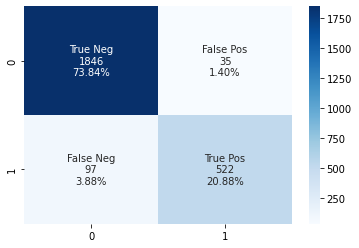

In [110]:
cf_matrix = confusion_matrix(y_test, y_pred_cv1)


# code by Dennis T from Medium.com (https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [112]:
print(classification_report(y_test, y_pred_cv1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1881
           1       0.94      0.84      0.89       619

    accuracy                           0.95      2500
   macro avg       0.94      0.91      0.93      2500
weighted avg       0.95      0.95      0.95      2500



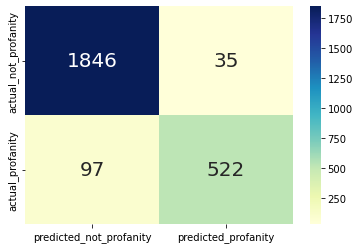

In [113]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

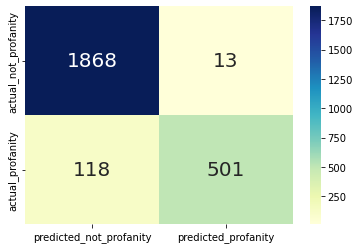

In [114]:
# The heat map for the second logistic regression model
cm2 = conf_matrix(y_test, y_pred_cv2)

In [128]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(cm1))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1']
results

,LogReg1
Accuracy,0.947
Precision,0.937
Recall,0.843
F1 Score,0.888


In [129]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1-unigrams', 'LogReg2-bigrams']
results

,LogReg1-unigrams,LogReg2-bigrams
Accuracy,0.947,0.948
Precision,0.937,0.975
Recall,0.843,0.809
F1 Score,0.888,0.884


Comparing the two models, the first model has better precision, while the second model has better accuracy and recall.

### Classifying using Naive Bayes

In [117]:
# Fit the first Naive Bayes model

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [118]:
# Fit the second Naive Bayes model

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

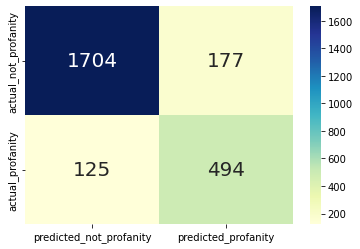

In [119]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

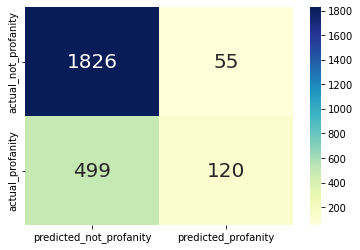

In [120]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

In [130]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1-unigrams', 'NB2-bigrams']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1-unigrams,LogReg2-bigrams,NB1-unigrams,NB2-bigrams
Accuracy,0.947,0.948,0.879,0.778
Precision,0.937,0.975,0.736,0.686
Recall,0.843,0.809,0.798,0.194
F1 Score,0.888,0.884,0.766,0.302


The first Naive Bayes model outperforms both Logistic Regression models.

### Using TF-IDF document matrix

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

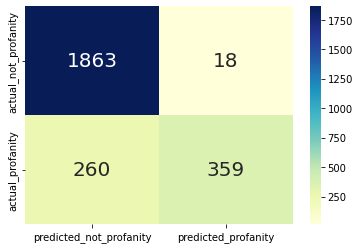

In [123]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm5 = conf_matrix(y_test, y_pred_tfidf1_lr)

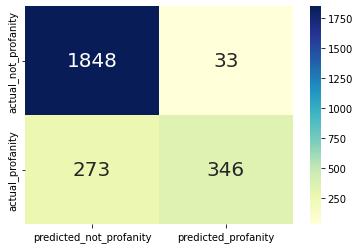

In [124]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm6 = conf_matrix(y_test, y_pred_tfidf2_lr)

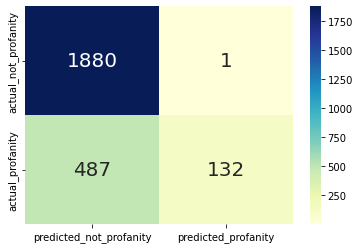

In [125]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm7 = conf_matrix(y_test, y_pred_tfidf1_nb)

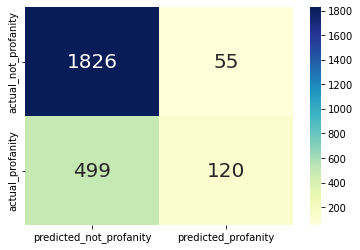

In [126]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf2)
cm8 = conf_matrix(y_test, y_pred_tfidf2_nb)

In [142]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm5, cm6, cm7, cm8)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR-TFIDF-unigrams', 'LR-TFIDF-bigrams', 'NB-TFIDF-unigrams', 'NB-TFIDF-bigrams']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LogReg1-unigrams,LogReg2-bigrams,NB1-unigrams,NB2-bigrams,LR1-TFIDF,LR2-TFIDF,NB1-TFIDF,NB2-TFIDF,LR-TFIDF-unigrams,LR-TFIDF-bigrams,NB-TFIDF-unigrams,NB-TFIDF-bigrams
Accuracy,0.947,0.948,0.879,0.778,0.889,0.878,0.805,0.778,0.889,0.878,0.805,0.778
Precision,0.937,0.975,0.736,0.686,0.952,0.913,0.992,0.686,0.952,0.913,0.992,0.686
Recall,0.843,0.809,0.798,0.194,0.580,0.559,0.213,0.194,0.580,0.559,0.213,0.194
F1 Score,0.888,0.884,0.766,0.302,0.721,0.693,0.351,0.302,0.721,0.693,0.351,0.302


Using Count Vectorizer document matrix, we were able to get the best recall, accuracy and precision and outperforms all other models 

In conclusion, using unigrams and counts seems to best classify profanity and not profanity game reviews.